## Summary Of the dataset (taken from IEEE Port)
- https://ieee-dataport.org/open-access/plantar-thermogram-database-study-diabetic-foot-complications
- The files are organized into 2  folders : DM (122) and Control(45)
- Each flder has the patient information labelled - eG:CG001_M (control group first patient , male)
- Inside , there is a angisome folder (LCA,LPA,MCA,MPA) and right,left foot - - The CSV file is for the true temperature data and it's dimensions matches the foot image.
- RGB thermograms are visual and so show thermal maps using color but they do not show exact temperatures.
- Total of 1670 RGB images and 1670 temperature files.
- (below taken from dataset description)
- The database helps research the use of infrared thermography for detecting diabetic foot problems early.
- This database is valuable for improving diagnostic techniques related to diabetic foot issues.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from PIL import Image
from PIL import ImageDraw, ImageFont
import seaborn as sns
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/data venture"

ThermoDataBase


In [ ]:
import os
base_path = "/content/drive/MyDrive/data venture/ThermoDataBase"
print("DM Group Files:", os.listdir(os.path.join(base_path, "DM Group")))
print("Control Group Files:", os.listdir(os.path.join(base_path, "Control Group")))


DM Group Files: ['DM058_F', 'DM096_M', 'DM052_F', 'DM010_M', 'DM116_F', 'DM090_F', 'DM077_F', 'DM073_F', 'DM012_F', 'DM016_F', 'DM098_M', 'DM056_F', 'DM094_F', 'DM069_F', 'DM037_F', 'DM084_F', 'DM063_F', 'DM108_F', 'DM004_M', 'DM023_F', 'DM088_M', 'DM042_F', 'DM102_F', 'DM106_F', 'DM029_F', 'DM048_F', 'DM080_F', 'DM006_F', 'DM074_F', 'DM093_F', 'DM036_M', 'DM025_M', 'DM067_F', 'DM115_F', 'DM099_F', 'DM051_F', 'DM030_F', 'DM011_F', 'DM032_M', 'DM053_M', 'DM034_F', 'DM111_F', 'DM091_M', 'DM076_M', 'DM055_F', 'DM070_F', 'DM097_F', 'DM107_M', 'DM045_F', 'DM060_F', 'DM120_F', 'DM087_F', 'DM028_M', 'DM043_M', 'DM101_F', 'DM026_M', 'DM089_F', 'DM031_F', 'DM079_M', 'DM018_M', 'DM114_F', 'DM020_F', 'DM092_F', 'DM014_F', 'DM112_M', 'DM105_F', 'DM075_F', 'DM118_M', 'DM062_M', 'DM110_F', 'DM050_F', 'DM027_M', 'DM086_F', 'DM044_F', 'DM100_F', 'DM035_F', 'DM071_F', 'DM054_F', 'DM061_F', 'DM033_M', 'DM039_M', 'DM065_F', 'DM121_F', 'DM059_F', 'DM021_F', 'DM008_M', 'DM040_F', 'DM082_F', 'DM046_M', 'DM1

## Data Extraction

In [ ]:
def process_group(group_path, group_label):
    data = []

    for subject in os.listdir(group_path):
        subject_path = os.path.join(group_path, subject)

        if os.path.isdir(subject_path):

            left_img = os.path.join(subject_path, f"{subject}_L.png")
            right_img = os.path.join(subject_path, f"{subject}_R.png")
            left_csv = os.path.join(subject_path, f"{subject}_L.csv")
            right_csv = os.path.join(subject_path, f"{subject}_R.csv")
            subject_id = subject.split("_")[0]
            gender = subject.split("_")[1]
            data.append([group_label, subject_id, gender, left_img, right_img, left_csv, right_csv])

    return data

In [ ]:
base_path = "/content/drive/MyDrive/data venture/ThermoDataBase"
dm_path = os.path.join(base_path, "DM Group")
control_path = os.path.join(base_path, "Control Group")
dm_data = process_group(dm_path, "DM")
control_data = process_group(control_path, "Control")
df = pd.DataFrame(dm_data + control_data, columns=["Group", "Subject_ID", "Gender",
                                                   "Left_Foot", "Right_Foot",
                                                   "Left_CSV", "Right_CSV"])

print(df.head())


  Group Subject_ID Gender                                          Left_Foot  \
0    DM      DM058      F  /content/drive/MyDrive/data venture/ThermoData...   
1    DM      DM096      M  /content/drive/MyDrive/data venture/ThermoData...   
2    DM      DM052      F  /content/drive/MyDrive/data venture/ThermoData...   
3    DM      DM010      M  /content/drive/MyDrive/data venture/ThermoData...   
4    DM      DM116      F  /content/drive/MyDrive/data venture/ThermoData...   

                                          Right_Foot  \
0  /content/drive/MyDrive/data venture/ThermoData...   
1  /content/drive/MyDrive/data venture/ThermoData...   
2  /content/drive/MyDrive/data venture/ThermoData...   
3  /content/drive/MyDrive/data venture/ThermoData...   
4  /content/drive/MyDrive/data venture/ThermoData...   

                                            Left_CSV  \
0  /content/drive/MyDrive/data venture/ThermoData...   
1  /content/drive/MyDrive/data venture/ThermoData...   
2  /content/dr

## Checking for Null, Duplicated values and Data Imbalance

In [ ]:
group_counts = df["Group"].value_counts()
print(group_counts)


Group
DM         122
Control     45
Name: count, dtype: int64


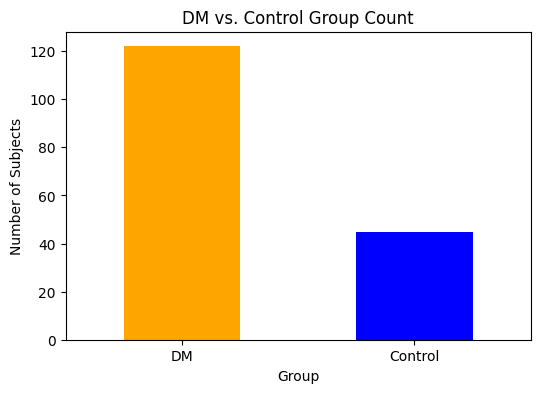

In [ ]:
plt.figure(figsize=(6, 4))
group_counts.plot(kind="bar", color=["orange", "blue"])
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.title("DM vs. Control Group Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
gender_counts = df.groupby(["Group", "Gender"]).size().unstack()
print(gender_counts)


Gender    F   M
Group          
Control  16  29
DM       89  33


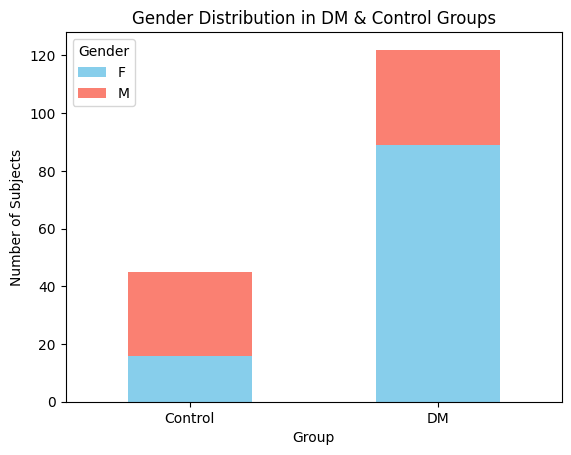

In [ ]:
gender_counts.plot(kind="bar", stacked=True, color=["skyblue", "salmon"])
plt.xlabel("Group")
plt.ylabel("Number of Subjects")
plt.title("Gender Distribution in DM & Control Groups")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.show()


In [ ]:
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
print(gender_percentage.round(2))


Gender       F      M
Group                
Control  35.56  64.44
DM       72.95  27.05


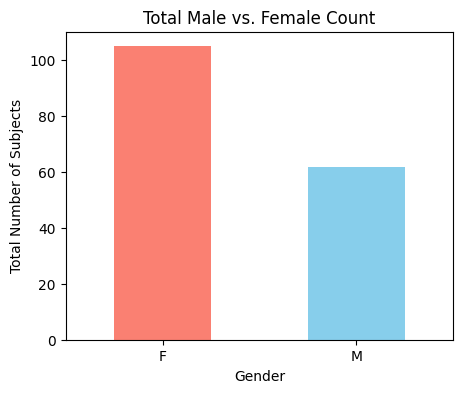

In [ ]:
total_gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(5, 4))
total_gender_counts.plot(kind="bar", color=["salmon", "skyblue"])
plt.xlabel("Gender")
plt.ylabel("Total Number of Subjects")
plt.title("Total Male vs. Female Count")
plt.xticks(rotation=0)
plt.show()


- Data Imbalance identified. This must be taken in account of when doing the train/test split

## Image Display

In [ ]:
random.seed(42)
dm_subjects = df[df['Group'] == 'DM'].sample(n=8, random_state=42)
control_subjects = df[df['Group'] == 'Control'].sample(n=8, random_state=42)

In [ ]:
def plot_images(group_df, ax, start_row, title):
    for idx, (index, row) in enumerate(group_df.iterrows()):
        right_image_path = row['Right_Foot']
        left_image_path = row['Left_Foot']
        right_image = Image.open(right_image_path)
        ax[start_row, 2*idx].imshow(right_image)
        ax[start_row, 2*idx].axis('off')
        ax[start_row, 2*idx].set_title(f"{title} - Right", fontsize=10)
        left_image = Image.open(left_image_path)
        ax[start_row, 2*idx+1].imshow(left_image)
        ax[start_row, 2*idx+1].axis('off')
        ax[start_row, 2*idx+1].set_title(f"{title} - Left", fontsize=10)




IndexError: index 4 is out of bounds for axis 0 with size 4

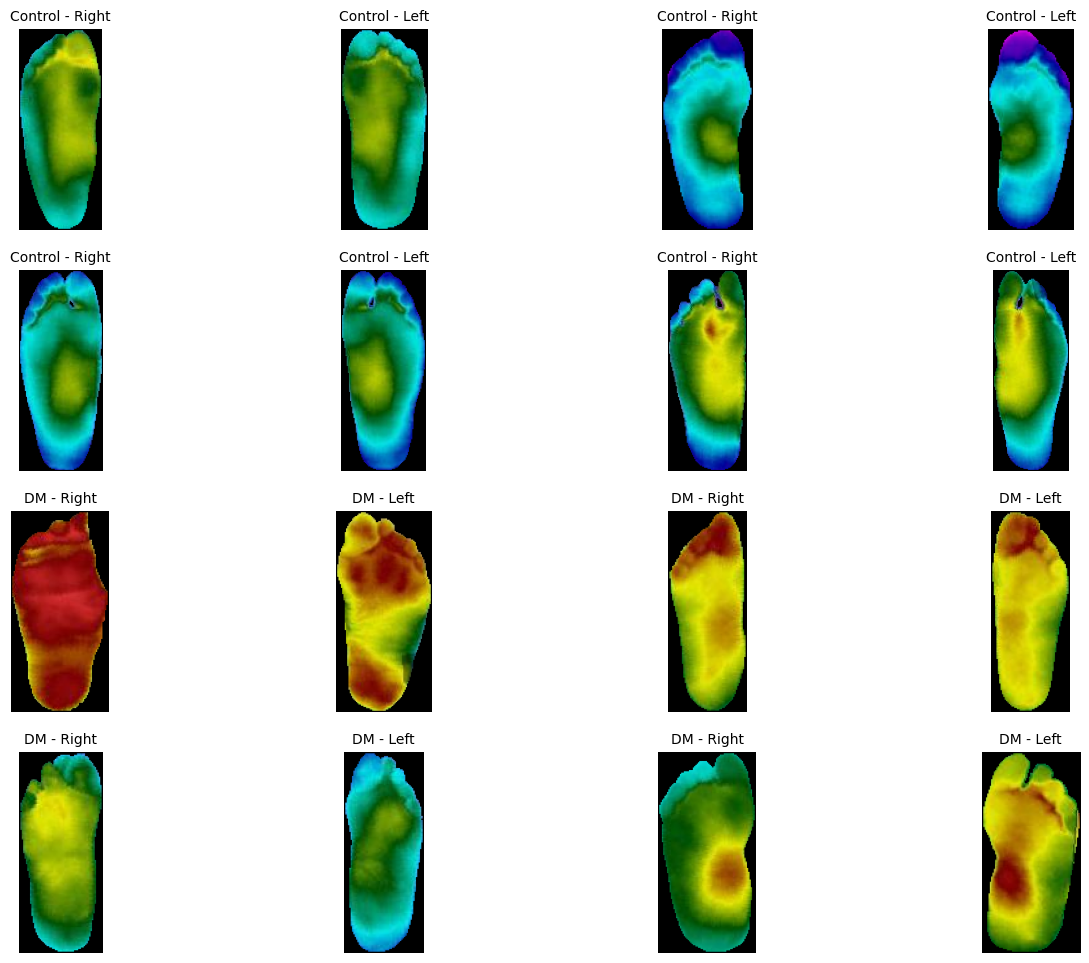

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(16, 12))
for i in range(4):
    plot_images(control_subjects.iloc[i*2:i*2+2], ax, start_row=i, title="Control")
for i in range(4):
    plot_images(dm_subjects.iloc[i*2:i*2+2], ax, start_row=i+2, title="DM")
plt.tight_layout()
plt.show()

Based on my observations, (Doesn't account of domain knowledge)
- Control groups (healthy ones) have thermal image symetry and contains a range of cooler colours such as green and blue
- DM groups lack symmetry and colours range range from green,blue,red and yellow

## Images

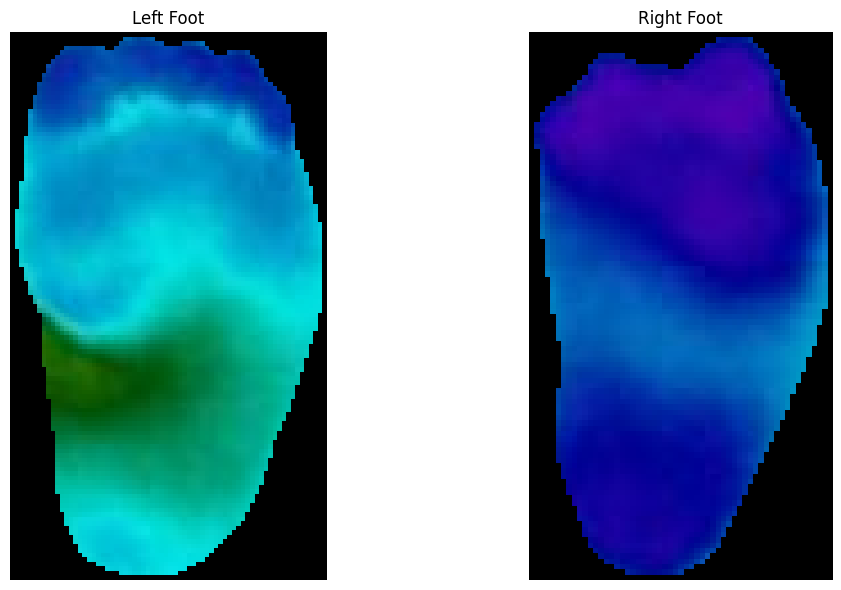

In [ ]:
left_foot_image_path = df.loc[df['Group'] == 'DM', 'Left_Foot'].iloc[0]
right_foot_image_path = df.loc[df['Group'] == 'DM', 'Right_Foot'].iloc[0]
left_foot_img = cv2.imread(left_foot_image_path)
right_foot_img = cv2.imread(right_foot_image_path)
left_foot_img_rgb = cv2.cvtColor(left_foot_img, cv2.COLOR_BGR2RGB)
right_foot_img_rgb = cv2.cvtColor(right_foot_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(left_foot_img_rgb)
axes[0].set_title('Left Foot')
axes[0].axis('off')

axes[1].imshow(right_foot_img_rgb)
axes[1].set_title('Right Foot')
axes[1].axis('off')

plt.tight_layout()
plt.show()



## Colour Intensity Variation - Identifying Foot Symmetry and Hotspots

In [ ]:
import cv2
import numpy as np

left_foot_image_path = df.loc[df['Group'] == 'DM', 'Left_Foot'].iloc[0]
right_foot_image_path = df.loc[df['Group'] == 'DM', 'Right_Foot'].iloc[0]

def extract_temperature_features(image_path):
    img = cv2.imread(image_path)  # Read in RGB format by default
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_colormap = cv2.applyColorMap(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLORMAP_JET)

    avg_pixel_intensity = np.mean(img)  # Average intensity across all channels
    avg_red = np.mean(img[:, :, 0])  # Red channel mean
    avg_green = np.mean(img[:, :, 1])  # Green channel mean
    avg_blue = np.mean(img[:, :, 2])  # Blue channel mean

    print(f"Average Pixel Intensity: {avg_pixel_intensity}")
    print(f"Average Red: {avg_red}")
    print(f"Average Green: {avg_green}")
    print(f"Average Blue: {avg_blue}")

    return avg_pixel_intensity, avg_red, avg_green, avg_blue

left_temp, left_red, left_green, left_blue = extract_temperature_features(left_foot_image_path)
right_temp, right_red, right_green, right_blue = extract_temperature_features(right_foot_image_path)


Average Pixel Intensity: 80.15438803620621
Average Red: 2.296576151121606
Average Green: 115.5051948051948
Average Blue: 122.66139315230224
Average Pixel Intensity: 52.41020836881849
Average Red: 11.729517969681485
Average Green: 24.79322091636859
Average Blue: 120.70788622040538


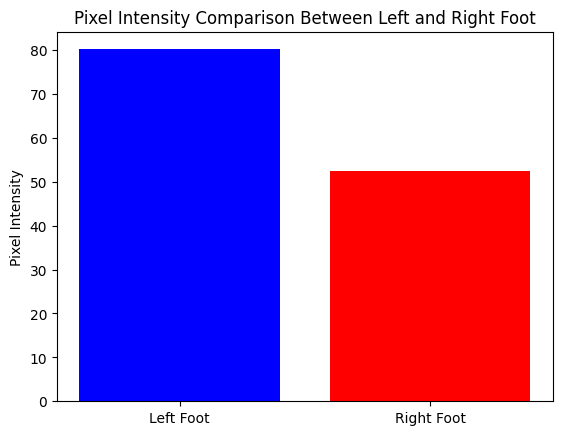

In [ ]:
import matplotlib.pyplot as plt

def plot_temperature_comparison(left_temp, right_temp):
    plt.bar(['Left Foot', 'Right Foot'], [left_temp, right_temp], color=['blue', 'red'])
    plt.ylabel('Pixel Intensity')
    plt.title('Pixel Intensity Comparison Between Left and Right Foot')
    plt.show()

plot_temperature_comparison(left_temp, right_temp)


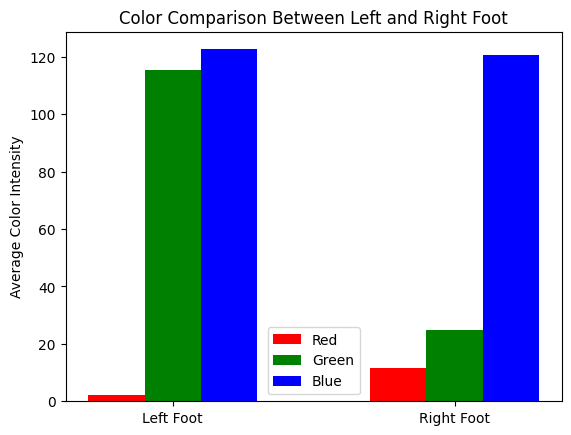

In [ ]:
def plot_color_comparison(left_red, right_red, left_green, right_green, left_blue, right_blue):
    labels = ['Left Foot', 'Right Foot']
    red_values = [left_red, right_red]
    green_values = [left_green, right_green]
    blue_values = [left_blue, right_blue]

    x = np.arange(len(labels))

    fig, ax = plt.subplots()
    ax.bar(x - 0.2, red_values, 0.2, label='Red', color='red')
    ax.bar(x, green_values, 0.2, label='Green', color='green')
    ax.bar(x + 0.2, blue_values, 0.2, label='Blue', color='blue')

    ax.set_ylabel('Average Color Intensity')
    ax.set_title('Color Comparison Between Left and Right Foot')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()


plot_color_comparison(left_red, right_red, left_green, right_green, left_blue, right_blue)


In [ ]:
# Apply pixel extraction for each group (DM and Control)
def calculate_intensity_difference(group_name):
    group_df = df[df['Group'] == group_name]


    group_df['Left_Temperature'] = group_df['Left_Foot'].apply(lambda x: extract_temperature_features(x)[0])
    group_df['Right_Temperature'] = group_df['Right_Foot'].apply(lambda x: extract_temperature_features(x)[0])

    # Calculate the temperature difference
    group_df['Intensity_Difference'] = group_df['Left_Temperature'] - group_df['Right_Temperature']

    return group_df

# Apply the function to 'DM' and 'Control' groups
dm_group = calculate_intensity_difference('DM')
control_group = calculate_intensity_difference('Control')

# Combine the results back into the original DataFrame if needed
df = pd.concat([dm_group, control_group], axis=0)

# Display the updated DataFrame
print(df.head())



Average Pixel Intensity: 80.15438803620621
Average Red: 2.296576151121606
Average Green: 115.5051948051948
Average Blue: 122.66139315230224
Average Pixel Intensity: 68.3195953540652
Average Red: 18.831678531285124
Average Green: 104.30376545522668
Average Blue: 81.82334207568378
Average Pixel Intensity: 76.08101010101011
Average Red: 80.57424242424243
Average Green: 121.89545454545454
Average Blue: 25.773333333333333
Average Pixel Intensity: 90.17352092352093
Average Red: 149.41946248196248
Average Green: 61.838113275613274
Average Blue: 59.26298701298701
Average Pixel Intensity: 78.03612106730387
Average Red: 132.79235364396655
Average Green: 95.17538829151732
Average Blue: 6.140621266427718
Average Pixel Intensity: 70.1489435864436
Average Red: 9.817567567567568
Average Green: 83.40725546975547
Average Blue: 117.22200772200772
Average Pixel Intensity: 56.35864165810209
Average Red: 126.28699897225077
Average Green: 23.888360739979444
Average Blue: 18.900565262076054
Average Pixel Int

<ipython-input-10-4d054eda953f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Left_Temperature'] = group_df['Left_Foot'].apply(lambda x: extract_temperature_features(x)[0])


Average Pixel Intensity: 71.68569580610021
Average Red: 77.4234068627451
Average Green: 116.23049428104575
Average Blue: 21.403186274509803
Average Pixel Intensity: 107.8917199391172
Average Red: 156.98182648401826
Average Green: 84.42210045662101
Average Blue: 82.27123287671233
Average Pixel Intensity: 71.94401649548708
Average Red: 127.19257703081233
Average Green: 81.76820728291317
Average Blue: 6.871265172735761
Average Pixel Intensity: 70.6905031892275
Average Red: 4.717505315379164
Average Green: 96.16413890857548
Average Blue: 111.18986534372786
Average Pixel Intensity: 57.65079572705472
Average Red: 128.48947024198822
Average Green: 24.225768476128188
Average Blue: 20.237148463047745
Average Pixel Intensity: 85.89788786482335
Average Red: 121.92188940092166
Average Green: 127.4639400921659
Average Blue: 8.307834101382488
Average Pixel Intensity: 52.27189943840865
Average Red: 111.2894819713431
Average Green: 36.77161076995749
Average Blue: 8.754605573925366
Average Pixel Intens

<ipython-input-10-4d054eda953f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Right_Temperature'] = group_df['Right_Foot'].apply(lambda x: extract_temperature_features(x)[0])
<ipython-input-10-4d054eda953f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Intensity_Difference'] = group_df['Left_Temperature'] - group_df['Right_Temperature']


Average Pixel Intensity: 70.1321772040335
Average Red: 3.1836068123493275
Average Green: 91.10156310755113
Average Blue: 116.11136169220002
Average Pixel Intensity: 67.31103703703704
Average Red: 34.602666666666664
Average Green: 109.31733333333334
Average Blue: 58.01311111111111
Average Pixel Intensity: 72.05975204498978
Average Red: 18.748849693251532
Average Green: 80.51514570552148
Average Blue: 116.91526073619632
Average Pixel Intensity: 72.81738253680177
Average Red: 19.2475499092559
Average Green: 109.69606775559589
Average Blue: 89.50852994555353
Average Pixel Intensity: 69.31423324150597
Average Red: 17.54931129476584
Average Green: 65.23732782369146
Average Blue: 125.1560606060606
Average Pixel Intensity: 87.72989583333333
Average Red: 12.964375
Average Green: 107.149375
Average Blue: 143.0759375
Average Pixel Intensity: 68.3632846461485
Average Red: 22.848330725091287
Average Green: 55.45683359415754
Average Blue: 126.78468961919666
Average Pixel Intensity: 68.25063399957017

<ipython-input-10-4d054eda953f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Left_Temperature'] = group_df['Left_Foot'].apply(lambda x: extract_temperature_features(x)[0])


Average Pixel Intensity: 71.89407276995306
Average Red: 4.589788732394366
Average Green: 89.93669974391806
Average Blue: 121.15572983354673
Average Pixel Intensity: 68.11697145405887
Average Red: 36.80062444246209
Average Green: 110.06478590544157
Average Blue: 57.48550401427297
Average Pixel Intensity: 69.66100076394194
Average Red: 19.993124522536288
Average Green: 69.06455309396486
Average Blue: 119.92532467532467
Average Pixel Intensity: 74.77978208232446
Average Red: 15.28450363196126
Average Green: 107.95762711864407
Average Blue: 101.09721549636804
Average Pixel Intensity: 63.000284830729164
Average Red: 32.8133544921875
Average Green: 40.382568359375
Average Blue: 115.804931640625
Average Pixel Intensity: 80.96349358974359
Average Red: 6.6075
Average Green: 113.77192307692307
Average Blue: 122.51105769230769
Average Pixel Intensity: 69.06151985318652
Average Red: 37.356231231231234
Average Green: 46.40628128128128
Average Blue: 123.42204704704704
Average Pixel Intensity: 67.257

<ipython-input-10-4d054eda953f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Right_Temperature'] = group_df['Right_Foot'].apply(lambda x: extract_temperature_features(x)[0])
<ipython-input-10-4d054eda953f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['Intensity_Difference'] = group_df['Left_Temperature'] - group_df['Right_Temperature']


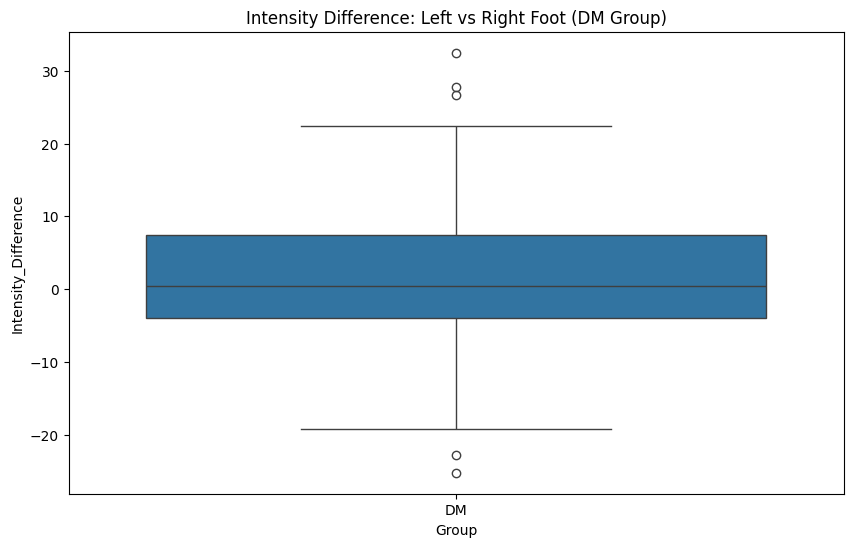

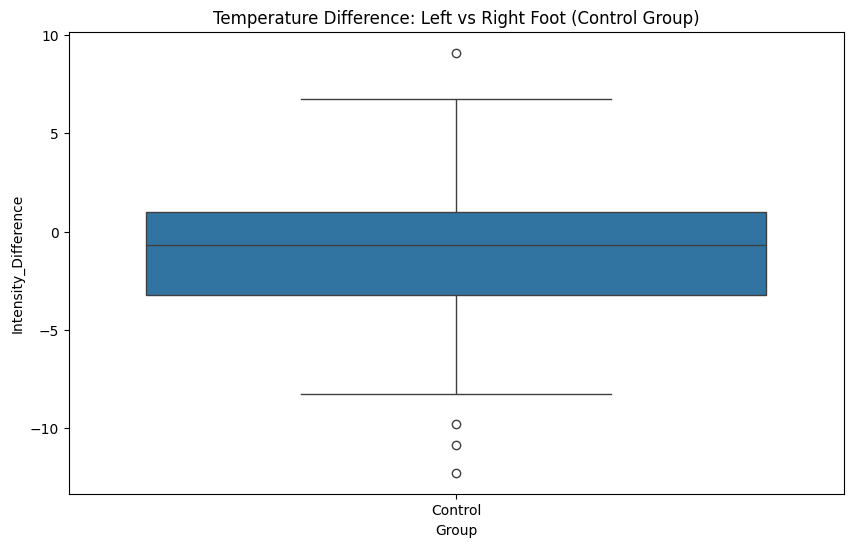

In [ ]:


# Plot for DM group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Intensity_Difference', data=dm_group)
plt.title('Intensity Difference: Left vs Right Foot (DM Group)')
plt.xlabel('Group')
plt.ylabel('Intensity_Difference')
plt.show()

# Plot for Control group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Intensity_Difference', data=control_group)
plt.title('Temperature Difference: Left vs Right Foot (Control Group)')
plt.xlabel('Group')
plt.ylabel('Intensity_Difference')
plt.show()


In [ ]:
dm_stats = dm_group['Intensity_Difference'].describe()
print("DM Group Statistics:")
print(f"Median: {dm_stats['50%']:.2f}")
print(f"Q1 (25th percentile): {dm_stats['25%']:.2f}")
print(f"Q3 (75th percentile): {dm_stats['75%']:.2f}")
print(f"Min: {dm_stats['min']:.2f}")
print(f"Max: {dm_stats['max']:.2f}")
print("\n")

control_stats = control_group['Intensity_Difference'].describe()
print("Control Group Statistics:")
print(f"Median: {control_stats['50%']:.2f}")
print(f"Q1 (25th percentile): {control_stats['25%']:.2f}")
print(f"Q3 (75th percentile): {control_stats['75%']:.2f}")
print(f"Min: {control_stats['min']:.2f}")
print(f"Max: {control_stats['max']:.2f}")


DM Group Statistics:
Median: 0.43
Q1 (25th percentile): -4.01
Q3 (75th percentile): 7.42
Min: -25.22
Max: 32.47


Control Group Statistics:
Median: -0.70
Q1 (25th percentile): -3.23
Q3 (75th percentile): 0.99
Min: -12.27
Max: 9.10


- I use colour rgb intensity to understand the variation of colour in images
- The DM Group has a very wide range of values, from -4.01-7.42 ->  suggest that the temperature differences between the left and right feet vary significantly whereas control group had a smaller range.
- The median for DM is positive - more redish values centred (ulcer, inflamation)-> these could be identication of hotspots. whereas the negative median for control group -> slightly cooler (bluish green value spread more)
- The IQR range is also higher for DM which shows variation in colour spread in the feet=> lack of symmetry
- The above shows, and this variations can be used to identify hotspots.

## CSV Files

- CSV files contain the temperature information
- This is different from the RGB colours we see (Red on feet just means it's hot) , we don't know how hot/ what the temperature really is


In [ ]:
dm_left_image_path = df.loc[df['Group'] == 'DM', 'Left_Foot'].iloc[0]
dm_left_csv_path = df.loc[df['Group'] == 'DM', 'Left_CSV'].iloc[0]


In [ ]:
left_image = Image.open(dm_left_image_path)
image_size = left_image.size
print(f"Image Size: {image_size}")

Image Size: (70, 121)


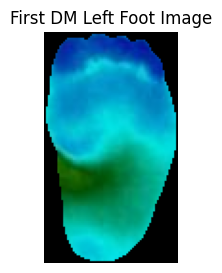

In [ ]:
plt.figure(figsize=(4, 3))
plt.imshow(left_image)
plt.axis('off')
plt.title("First DM Left Foot Image")
plt.show()

In [ ]:
dm_left_temp_df = pd.read_csv(dm_left_csv_path, header=None)
print("Shape of the CSV file:", dm_left_temp_df.shape)
print("\nFirst few rows of the temperature data:")
print(dm_left_temp_df.head())

Shape of the CSV file: (121, 70)

First few rows of the temperature data:
   0    1    2    3    4    5    6    7    8    9   ...   60   61   62   63  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    64   65   66   67   68  69  
0  0.0  0.0  0.0  0.0  0.0   0  
1  0.0  0.0  0.0  0.0  0.0   0  
2  0.0  0.0  0.0  0.0  0.0   0  
3  0.0  0.0  0.0  0.0  0.0   0  
4  0.0  0.0  0.0  0.0  0.0   0  

[5 rows x 70 columns]


In [ ]:
print("\nSummary statistics of the temperature data:")
print(dm_left_temp_df.describe())


Summary statistics of the temperature data:
          0           1           2           3           4           5   \
count  121.0  121.000000  121.000000  121.000000  121.000000  121.000000   
mean     0.0    1.917860    4.020983    6.756058    8.616231    9.620471   
std      0.0    6.793751    9.355443   11.314312   12.086532   12.337145   
min      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.0    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.0    0.000000    0.000000   25.343000   25.330000   25.318000   
max      0.0   25.946000   25.934000   25.996000   26.284000   26.321000   

               6           7           8           9   ...          60  \
count  121.000000  121.000000  121.000000  121.000000  ...  121.000000   
mean    10.629198   13.784835   15.762917   17.526686  ...   15.134397   
std     12.507411   12.877284   12.655179   12.1

It's taking it column wise

In [ ]:
min_temp = dm_left_temp_df.min().min()
max_temp = dm_left_temp_df.max().max()
median_temp = dm_left_temp_df.median().median()
print(f"Minimum Temperature: {min_temp}")
print(f"Maximum Temperature: {max_temp}")
print(f"Median Temperature: {median_temp}")

Minimum Temperature: 0.0
Maximum Temperature: 28.165
Median Temperature: 25.500500000000002


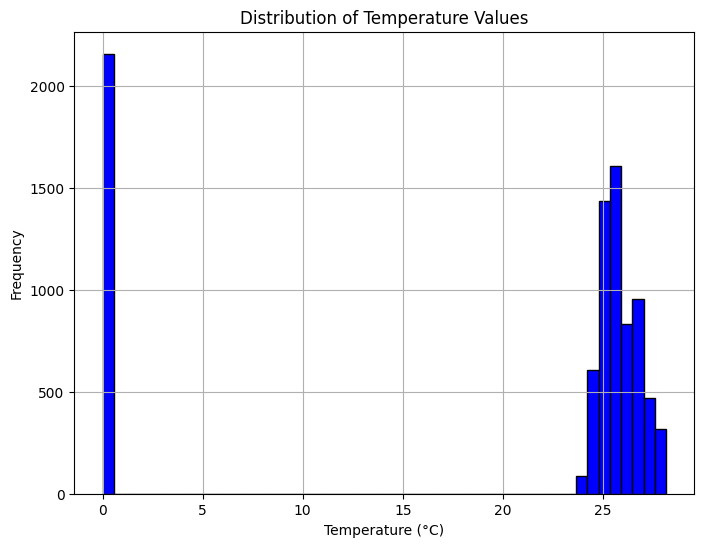

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dm_left_temp_df.values.flatten(), bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Temperature Values')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 0 temperature is insignificant - it is just the background black image not accounted for

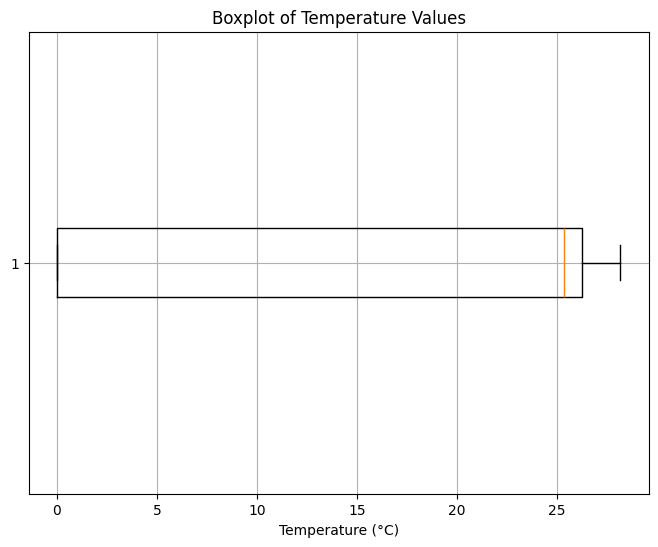

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(dm_left_temp_df.values.flatten(), vert=False)
plt.title('Boxplot of Temperature Values')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.show()

The zeros in the CSV represent areas where no temperature was recorded, such as regions with no skin or tissue. These zeros align with the corresponding areas in the thermal image. so if i i remove them would break the correlation between the temperature data and the image, leading to inaccuracies.

In [ ]:
dm_left_temp_df = pd.read_csv(dm_left_csv_path, header=None)
left_image = Image.open(dm_left_image_path)


In [ ]:
csv_dimensions = dm_left_temp_df.shape
image_dimensions = left_image.size
print(f"CSV dimensions: {csv_dimensions}")
print(f"Image dimensions: {image_dimensions}")
if csv_dimensions != (image_dimensions[1], image_dimensions[0]):
    print("Warning: CSV and image dimensions do not match!")
else:
    print("Dimensions match!")

CSV dimensions: (121, 70)
Image dimensions: (70, 121)
Dimensions match!


# Attempting to match RGB with temp

In [ ]:
unique_temp_values = dm_left_temp_df.values.flatten()
unique_temp_values = unique_temp_values[unique_temp_values != 0]
unique_temp_values = set(unique_temp_values)
print("Unique temperature values (ignoring 0):")
print(sorted(unique_temp_values))

Unique temperature values (ignoring 0):
[24.011, 24.037, 24.049, 24.062, 24.075, 24.088, 24.1, 24.113, 24.126, 24.139, 24.151, 24.164, 24.177, 24.19, 24.202, 24.215, 24.228, 24.241, 24.253, 24.266, 24.279, 24.292, 24.304, 24.317, 24.33, 24.343, 24.355, 24.368, 24.381, 24.393, 24.406, 24.419, 24.432, 24.444, 24.457, 24.47, 24.482, 24.495, 24.508, 24.521, 24.533, 24.546, 24.559, 24.571, 24.584, 24.597, 24.609, 24.622, 24.635, 24.647, 24.66, 24.673, 24.686, 24.698, 24.711, 24.724, 24.736, 24.749, 24.762, 24.774, 24.787, 24.8, 24.812, 24.825, 24.838, 24.85, 24.863, 24.876, 24.888, 24.901, 24.914, 24.926, 24.939, 24.952, 24.964, 24.977, 24.99, 25.002, 25.015, 25.027, 25.04, 25.053, 25.065, 25.078, 25.091, 25.103, 25.116, 25.129, 25.141, 25.154, 25.166, 25.179, 25.192, 25.204, 25.217, 25.23, 25.242, 25.255, 25.267, 25.28, 25.293, 25.305, 25.318, 25.33, 25.343, 25.356, 25.368, 25.381, 25.393, 25.406, 25.419, 25.431, 25.444, 25.456, 25.469, 25.482, 25.494, 25.507, 25.519, 25.532, 25.544, 25.55

In [ ]:
min_temp = min(unique_temp_values)
max_temp = max(unique_temp_values)
intervals = np.arange(min_temp, max_temp + 0.2, 0.2)
for interval in intervals:
    temp_values_in_interval = [value for value in unique_temp_values if interval <= value < interval + 0.2]
    if temp_values_in_interval:
        print(f"Values in range {interval:.1f} - {interval + 0.2:.1f}: {temp_values_in_interval}")

Values in range 24.0 - 24.2: [24.1, 24.19, 24.202, 24.088, 24.075, 24.126, 24.011, 24.164, 24.062, 24.139, 24.151, 24.037, 24.049, 24.177, 24.113]
Values in range 24.2 - 24.4: [24.241, 24.381, 24.393, 24.292, 24.406, 24.279, 24.368, 24.266, 24.343, 24.215, 24.253, 24.33, 24.355, 24.317, 24.304, 24.228]
Values in range 24.4 - 24.6: [24.571, 24.419, 24.47, 24.482, 24.457, 24.546, 24.533, 24.432, 24.521, 24.508, 24.559, 24.444, 24.609, 24.597, 24.495, 24.584]
Values in range 24.6 - 24.8: [24.66, 24.749, 24.8, 24.647, 24.736, 24.635, 24.622, 24.711, 24.762, 24.698, 24.686, 24.787, 24.774, 24.673, 24.724]
Values in range 24.8 - 25.0: [24.914, 24.85, 24.952, 24.939, 24.838, 24.964, 24.825, 24.876, 24.901, 24.99, 24.812, 24.926, 24.888, 24.977, 24.863, 25.002]
Values in range 25.0 - 25.2: [25.078, 25.053, 25.154, 25.065, 25.04, 25.129, 25.015, 25.027, 25.116, 25.179, 25.166, 25.091, 25.192, 25.204, 25.141, 25.103]
Values in range 25.2 - 25.4: [25.393, 25.28, 25.267, 25.217, 25.318, 25.356, 25

- I will take the median in this range so I can locate it in the csv file and plot it

In [ ]:
median_values = []
for interval in intervals:
    temp_values_in_interval = [value for value in unique_temp_values if interval <= value < interval + 0.2]
    if temp_values_in_interval:
        median_temp = np.median(temp_values_in_interval)
        median_values.append((interval, median_temp))

print("Median values for each interval:")
for interval, median in median_values:
    print(f"Interval: {interval:.1f} - {interval + 0.2:.1f}, Median: {median:.3f}")

Median values for each interval:
Interval: 24.0 - 24.2, Median: 24.113
Interval: 24.2 - 24.4, Median: 24.310
Interval: 24.4 - 24.6, Median: 24.514
Interval: 24.6 - 24.8, Median: 24.711
Interval: 24.8 - 25.0, Median: 24.907
Interval: 25.0 - 25.2, Median: 25.110
Interval: 25.2 - 25.4, Median: 25.312
Interval: 25.4 - 25.6, Median: 25.513
Interval: 25.6 - 25.8, Median: 25.714
Interval: 25.8 - 26.0, Median: 25.915
Interval: 26.0 - 26.2, Median: 26.115
Interval: 26.2 - 26.4, Median: 26.315
Interval: 26.4 - 26.6, Median: 26.515
Interval: 26.6 - 26.8, Median: 26.714
Interval: 26.8 - 27.0, Median: 26.913
Interval: 27.0 - 27.2, Median: 27.111
Interval: 27.2 - 27.4, Median: 27.309
Interval: 27.4 - 27.6, Median: 27.507
Interval: 27.6 - 27.8, Median: 27.711
Interval: 27.8 - 28.0, Median: 27.913
Interval: 28.0 - 28.2, Median: 28.092


find cordinates on csv-> label and plot on image

In [ ]:
from PIL import ImageDraw, ImageFont
left_image = Image.open(dm_left_image_path)
draw = ImageDraw.Draw(left_image)
font = ImageFont.load_default()
font.size=0.4
print("using font",font)
for interval, median_temp in median_values:
    # Find the locations of median_temp in the CSV
    locations = np.where(dm_left_temp_df.values == median_temp)

    # Draw text for each found location
    for row, col in zip(locations[0], locations[1]):
        # Choose a position near the center of the pixel for each label
        text_position = (col, row)

        # Add the label text (temperature value) to the image at the position
        draw.text(text_position, f"{median_temp:.2f}", fill=(255, 255, 255),font=font)  # Red color for text

using font <PIL.ImageFont.FreeTypeFont object at 0x7c706e272550>


In [ ]:
left_image.save("labeled_left_image.png")

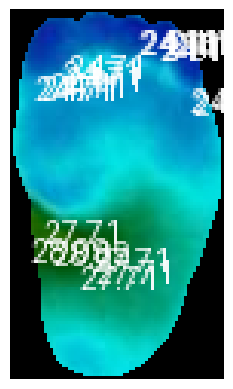

In [ ]:
image_path = '/content/labeled_left_image.png'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()

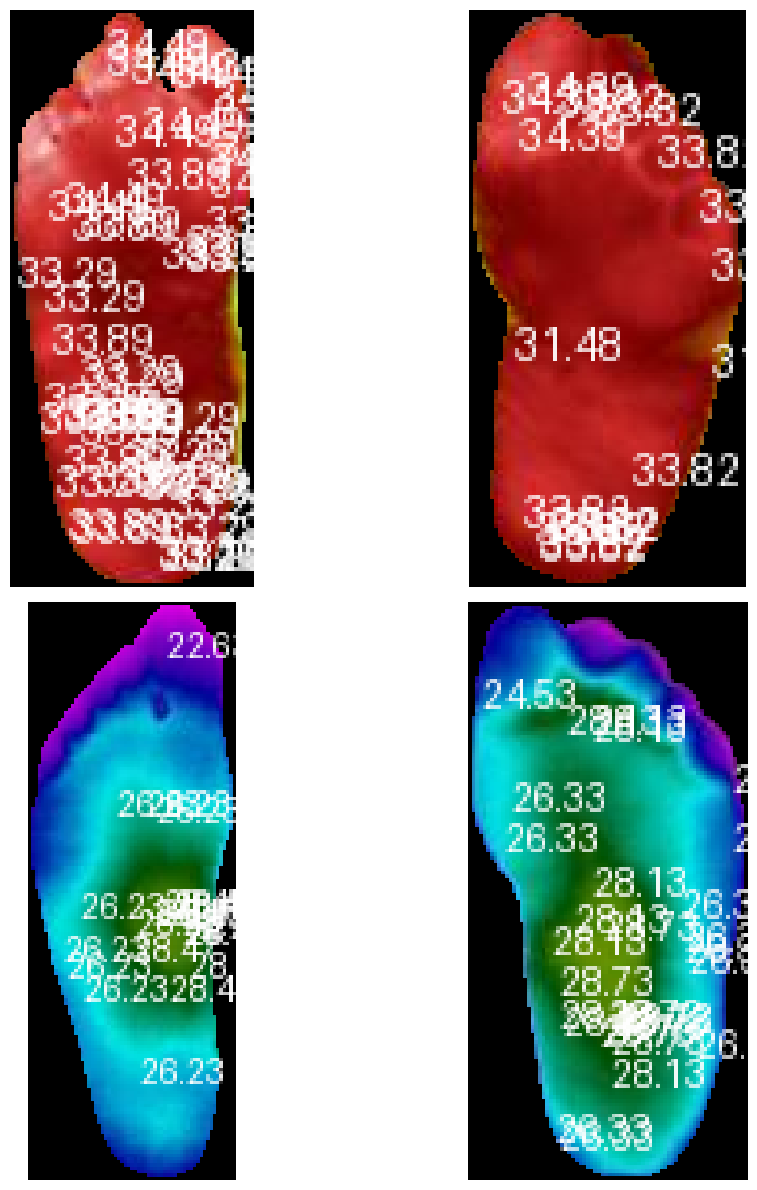

In [ ]:
import random
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def process_and_label_images(df):
    # Select random 2 pairs of DM and 2 pairs of Control
    selected_dm = random.sample(df[df['Group'] == 'DM'].index.tolist(), 2)
    selected_control = random.sample(df[df['Group'] == 'Control'].index.tolist(), 2)

    selected_rows = df.iloc[selected_dm + selected_control]

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 grid for the images

    for idx, (index, row) in enumerate(selected_rows.iterrows()):
        # Initialize retry loop for checking image and CSV size
        retry_count = 0
        while True:
            # Paths
            left_image_path = row['Left_Foot']
            right_image_path = row['Right_Foot']
            left_csv_path = row['Left_CSV']
            right_csv_path = row['Right_CSV']

            # Load images and CSVs
            left_image = Image.open(left_image_path)
            right_image = Image.open(right_image_path)
            dm_left_temp_df = pd.read_csv(left_csv_path, header=None)
            dm_right_temp_df = pd.read_csv(right_csv_path, header=None)

            # Check if image size and CSV dimensions match
            if left_image.size == (dm_left_temp_df.shape[1], dm_left_temp_df.shape[0]) and \
               right_image.size == (dm_right_temp_df.shape[1], dm_right_temp_df.shape[0]):
                # If the sizes match, proceed with this pair
                break
            else:
                # If sizes don't match, retry with another random selection
                if retry_count > 3:  # Limit the number of retries to avoid infinite loop
                    print("Size mismatch after multiple retries. Skipping this pair.")
                    break
                retry_count += 1
                selected_rows = df.iloc[random.sample(df.index.tolist(), 4)]  # Re-select random rows
                row = selected_rows.iloc[0]  # Take the first row from the new selection

        # Get unique temperature values excluding 0 for both left and right foot
        unique_left_temp_values = np.unique(dm_left_temp_df.values)
        unique_left_temp_values = unique_left_temp_values[unique_left_temp_values > 0]

        unique_right_temp_values = np.unique(dm_right_temp_df.values)
        unique_right_temp_values = unique_right_temp_values[unique_right_temp_values > 0]

        # Define the temperature intervals (0.4 intervals)
        intervals = np.arange(np.min(unique_left_temp_values), np.max(unique_left_temp_values), 0.6)

        # Calculate the median for each interval
        median_values = []
        for interval in intervals:
            temp_values_in_interval = [value for value in unique_left_temp_values if interval <= value < interval + 0.4]

            if temp_values_in_interval:
                median_temp = np.median(temp_values_in_interval)
                median_values.append((interval, median_temp))

        # Prepare the left and right images for labeling
        left_draw = ImageDraw.Draw(left_image)
        right_draw = ImageDraw.Draw(right_image)
        font = ImageFont.load_default()
        font.size = 1  # Adjust the font size

        # Draw labels on both left and right images
        for interval, median_temp in median_values:
            # Label left image
            locations = np.where(dm_left_temp_df.values == median_temp)
            for row, col in zip(locations[0], locations[1]):
                text_position = (col, row)
                left_draw.text(text_position, f"{median_temp:.2f}", fill=(255, 255, 255), font=font)

            # Label right image
            locations = np.where(dm_right_temp_df.values == median_temp)
            for row, col in zip(locations[0], locations[1]):
                text_position = (col, row)
                right_draw.text(text_position, f"{median_temp:.2f}", fill=(255, 255, 255), font=font)

        # Plot the images in pairs (Right and Left)
        ax = axes[idx // 2, idx % 2]
        ax.imshow(right_image)
        #ax.set_title(f"Right Foot ({'DM' if row['Group'] == 'DM' else 'Control'})")
        ax.axis('off')

        ax = axes[idx // 2, (idx % 2) + 1 if (idx % 2) == 0 else (idx % 2)]
        ax.imshow(left_image)
        #ax.set_title(f"Left Foot ({'DM' if row['Group'] == 'DM' else 'Control'})")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
process_and_label_images(df)


Things to take note of before model training
- ensure image sizes are the same (resize all) - model that is only using images
- training model soley on csv files (accounts for temperature variance and symmetry)
- ensure the csv file dimension matches the resized image (for now all csv files match the corresponding image dimension , however not all images are of the same size ) - this to take account when training a model that takes account of model